In [1]:
import video.vid as v
import pandas as pd
from video import df
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt


In [2]:
reload(v)
path = 'videos/Banned Pokemon Seizure Scene.mp4'
vid = v.Video.from_file(path)
vid_df = df.get_vid_df(path)

## Testing that outputs are the same as `df`

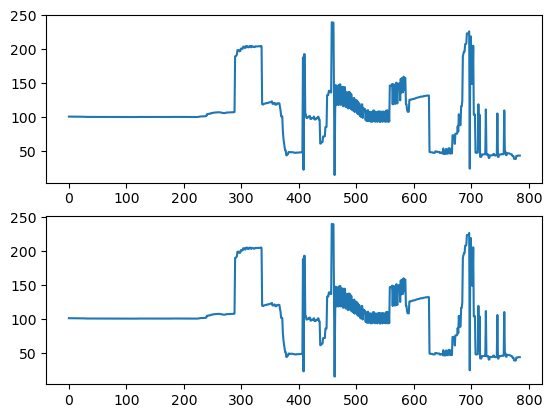

In [3]:
reload(v)
fig, axs = plt.subplots(2,1)
axs[0].plot(vid.lightness.agg('mean') )
axs[1].plot(vid_df.groupby(level=0).lightness.mean())
plt.show()

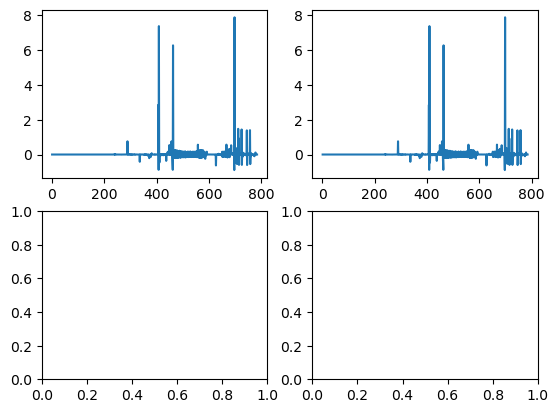

In [7]:
reload(v)
fig, axs = plt.subplots(2,2)
axs[0,0].plot(vid.pct_change(1,'lightness'))
axs[0][1].plot(vid.lightness.pct_change(1))
